# Import Data

In [26]:
import numpy as np
import pandas as pd
import os 
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [27]:
labels=[]
data=[]

In [28]:
folder_path= "images"
folders = os.listdir(folder_path)

for folder in folders:
    pathPerFolder=os.path.join(folder_path,folder);
    folderChild= os.listdir(pathPerFolder)
    for file in folderChild:
        img_path=os.path.join(pathPerFolder,file)
        img=cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        img= img/255.0
        frames=img
        data.append(img)
        labels.append(folder)
        
data=np.array(data,dtype=np.float32)
labels=np.array(labels)
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

Data shape: (5243, 64, 64, 3)
Labels shape: (5243,)


In [29]:
data[0].shape
sp1,sp2,sp3,sp4=data.shape
sp2
print(sp2*sp3*sp4)

12288


In [30]:
data[0][0][0]

array([0., 0., 0.], dtype=float32)

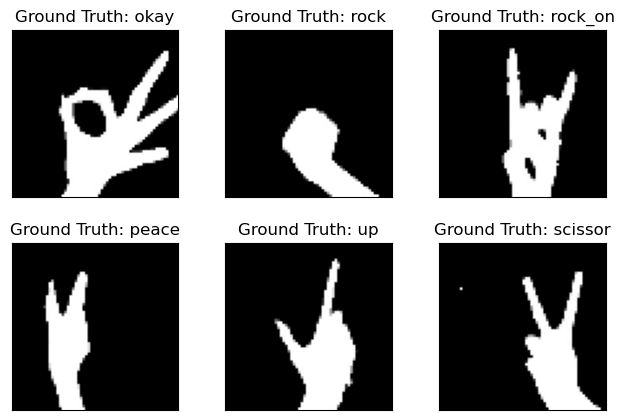

In [31]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  rand_index = np.random.randint(0, data.shape[0])
  plt.imshow(data[rand_index])
  plt.title("Ground Truth: {}".format(labels[rand_index]))
  plt.xticks([])
  plt.yticks([])
fig
plt.show()

In [32]:
np.unique(labels)

array(['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock',
       'rock_on', 'scissor', 'thumbs', 'up'], dtype='<U15')

In [33]:
#mapping ke int
unique_labels = np.unique(labels)
print(unique_labels)
mapping = {label: i for i, label in enumerate(unique_labels)}
labelsFinal = [mapping[label] for label in labels]

#for i in range(len(labels)):
#    labelsFinal[i]=labelsFinal[i]/10;
    
labelsFinal

['call_me' 'fingers_crossed' 'okay' 'paper' 'peace' 'rock' 'rock_on'
 'scissor' 'thumbs' 'up']


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [34]:
 torch.tensor(labelsFinal).unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
torch.tensor(data)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000

# Modeling Data

In [39]:
data_tensor = torch.tensor(data)
labels_tensor = torch.tensor(labelsFinal)

rand_idx = torch.randperm(len(data_tensor))


data_tensor = data_tensor[rand_idx]
labels_tensor = labels_tensor[rand_idx]


x_trains = data_tensor.reshape(-1, sp2*sp3*sp4)
y_trains = labels_tensor


split = int(0.8*len(x_trains))
x_train = x_trains[:split]
y_train = y_trains[:split]
x_testing = x_trains[split:]
y_testing = y_trains[split:]

In [40]:
y_train

tensor([8, 0, 8,  ..., 3, 6, 7])

In [41]:
x_train

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0078, 0.0078, 0.0078,  ..., 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 1.0000, 1.0000, 1.0000]])

In [42]:
x_train.unique()

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

# Layer

In [43]:
class Layer:
    def __init__(self,weight,bias):
        self.weight=weight;
        self.bias=bias;
    
    def activationSigmoid(self,input) : #Sigmoid
        sigmoid = torch.sigmoid(input)
        return sigmoid
    
    def activationRelu(self,input) : #ReLu
        m = nn.ReLU()
        return m(input)
    
    def activationSM(self,input) : #SoftMax
        #A = torch.exp(input) / torch.sum(torch.exp(input))
        #return A
        m = nn.Softmax(dim=1)
        return m(input)
   
    def dSigmoid(self,input):
        sigmoid=torch.sigmoid(input)
        return sigmoid * (1-sigmoid)
    
    def dRelu(self,input):
        return torch.where(input>0,1.0,0.0)
    
    def dSoftMax(self,input):
        sm=torch.softmax(input,dim=1)
        return sm * (1-sm)
        
    def forward1(self, input) :
         input = input.float()
         output = (torch.matmul(input, self.weight)) + self.bias
         return output, self.activationRelu(output)
       
    def forward2(self, input) :
        output=(torch.matmul(input,self.weight))+self.bias
        return output,self.activationSigmoid(output)
    
    def forward3(self, input) :
        output=(torch.matmul(input, self.weight)) + self.bias
        #return output, self.activationSM(output)
        return output, output

# Network

In [ ]:
class Network:
    def __init__(self,w1,b1,w2,b2,w3,b3,batch_size=10):
        self.batch_size=batch_size;
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.layer1=Layer(self.w1,self.b1)
        self.layer2=Layer(self.w2,self.b2)
        self.layer3=Layer(self.w3,self.b3)
        
    def forward1(self,x):
        pred,a=self.layer1.forward1(x)
        return pred,a
    
    def forward2(self,x):
        pred,a=self.layer2.forward2(x)
        return pred,a
    
    def forward3(self,x):
        pred,a=self.layer3.forward3(x)
        return pred,a
    
    def backPropLayer3(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y,m):
        dZ3=A3-Y;
        dW = (1/m) * A2.T @ dZ3
        dB = (1/m) * torch.sum(dZ3, dim=0)
        return self.backPropLayer2(dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW,dB);
        
    def backPropLayer2(self,dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW3,db3):
        dZ2 = (dZ3.float() @ W3.T.float()) * self.layer2.dSigmoid(Z2.float())
        dW = (1/m) * A1.T.float() @ dZ2.float()
        db = 1 / m * torch.sum(dZ2, dim=0)
        return self.backPropLayer1(dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW,db)
        
    def backPropLayer1(self,dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW2,db2):
        dZ1 = (dZ2.float()@W2.T.float()) * self.layer1.dRelu(Z1.float())
        dW = (1/m) * X.T.float() @ dZ1.float()
        db = 1 / m * torch.sum(dZ1, dim=0)
        return dW, db, dW2, db2, dW3, db3
    
    def single_processing(self,input):
        pred1,error1=self.forward1(input)
        pred2,error2=self.forward2(error1)
        pred3,error3=self.forward3(error2)
        return pred1,error1,pred2,error2,pred3,error3
    
    def batch_processing(self,input,target):
        for i in range(0,len(input)-1,self.batch_size):
            new_len = [input[j].tolist() for j in range(i, i+self.batch_size)]
            new_ten=torch.Tensor(new_len)
            new_tar = [target[j].tolist() for j in range(i, i+self.batch_size)]
            new_tar2=torch.Tensor(new_tar)
            self.single_processing(new_ten)

# Training

In [91]:
class Training:
    def __init__(self,x_train,y_train,seed=52,learning_rate=0.01,epoch=3500,stop=8):
        self.seed=seed
        torch.manual_seed(self.seed)
        randData=torch.randperm(len(x_train))
        self.x_train=x_train[randData];
        self.y_train=y_train[randData];
        self.m=self.x_train.shape[0]
        self.learning_rate=learning_rate;
        self.w1=torch.randn((self.x_train.shape[1],1024), dtype=torch.float32) * np.sqrt(1./(1024))
        self.b1=torch.randn((1024), dtype=torch.float32) * np.sqrt(1./(1024))
        self.w2=torch.randn((1024,64), dtype=torch.float32) * np.sqrt(1./(64))
        self.b2=torch.randn((64), dtype=torch.float32) * np.sqrt(1./(64))
        self.w3=torch.randn((64,10), dtype=torch.float32) * np.sqrt(1./(10))
        self.b3=torch.randn((10), dtype=torch.float32) * np.sqrt(1./(10))
        self.epoch=epoch
        self.learning_rate=learning_rate
        self.stop=stop
        self.model=Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
   
    def convertY(self,Y):
         Y_res = torch.zeros((len(Y), 10))
         Y_res[torch.arange(len(Y)), Y.long()] = 1
         return Y_res
        
    def forward_prop(self,X):
        pred1,error1,pred2,error2,pred3,error3=self.model.single_processing(X)
        return pred1.double(), error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def backward_prop(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y):
        dW, db, dW2, db2, dW3, db3=self.model.backPropLayer3(Z1, A1, Z2, A2, A3,self.w1,self.w2,self.w3, self.x_train, self.convertY(self.y_train),self.m)
        return torch.tensor(dW), torch.tensor(db), torch.tensor(dW2), torch.tensor(db2),torch.tensor(dW3), torch.tensor(db3)
    
    def update_params(self, dW1, db1, dW2, db2, dW3, db3):
        self.w1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.w2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.w3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
    
    def get_predictions(self,A):
        #print(torch.argmax(A, dim=1))
        #return torch.argmax(A, 0)
        A_sm = torch.softmax(A, dim=1) 
        return torch.argmax(A_sm, dim=0)

    def get_accuracy(self,predictions, Y):
        return (predictions == Y).float().mean()
    
    def trainingData(self):
        verge=0;
        treshold=0;
        for i in range(self.epoch):
            Z1,A1,Z2,A2,Z3,A3= self.forward_prop(self.x_train)
            #LR Rescheduling
            lr=self.learning_rate*(0.95**(i//100))
            dW1, db1, dW2, db2,dW3,db3 = self.backward_prop(Z1, A1, Z2, A2, A3, self.w1,self.w2,self.w3,self.x_train, self.y_train)
            self.update_params(dW1, db1, dW2, db2, dW3, db3)
            print(f"Iteration {i}")
            predictions=self.get_predictions(A3.T) 
            #print(f"Iter {i} dan W1 max: {self.w1.max():.4f}, min: {self.w1.min():.4f}")
            #print(f"Iter {i} dam A3 max: {A3.max():.4f}, min: {A3.min():.4f}, sum: {A3.sum()}")
            #print(f"Iter {i} dan Predictions unique: {predictions.unique(return_counts=True)}")
            #print(f"Coba :{A3.T} dan predict : {predictions.unique()}")
            print(f"Prediction: {predictions.numpy()}, Label : {self.y_train.numpy()}")
            acc=self.get_accuracy(predictions,self.y_train)
            print(f"accuracy : {acc*100}%")
            if(verge>acc and (acc*100)>80):
                treshold+=1
            else:
                verge=acc
                treshold=0
            if(treshold>=self.stop):
                return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3
        return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3 
            

# Validation

In [138]:
class Validation:
    def __init__(self,w1,b1,w2,b2,w3,b3,index):
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.index=index
        
    def predict(self,X):
        Z1,A1,Z2,A2,Z3,A3=self.forwardValid(X)
        #print(A3)
        prediction=self.get_prediction_validation(A3)
        return prediction
    
    def forwardValid(self,X):
        model= Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
        pred1,error1,pred2,error2,pred3,error3=model.single_processing(X)
        return pred1, error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def get_prediction_validation(self,A):
        A_sm = torch.softmax(A, dim=1) 
        return torch.argmax(A_sm, dim=1)
            
    def ValidationMain(self):
        imageValid=x_testing[self.index,:,None]
        prediction=self.predict(imageValid.T)
        label=y_testing[self.index]
        print(f"Hasil : {prediction}, Data Asli : {label}")
        return prediction==label

# Start!

In [69]:
y_train
x_train
print(y_train)
print(type(y_train))
print(type(x_train))
x_train.shape
y_train.shape

tensor([8, 0, 8,  ..., 3, 6, 7])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.Size([4194])

In [70]:
print(x_train.shape)
x_train[0]

torch.Size([4194, 12288])


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [71]:
y_train.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
y_train.shape

torch.Size([4194])

In [73]:
x_train.unique()

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [92]:
train = Training(x_train,y_train)
w1,b1,w2,b2,w3,b3=train.trainingData()
w1,b1,w2,b2,w3,b3

Iteration 0
Prediction: [3 5 9 ... 0 5 5], Label : [9 5 4 ... 8 8 1]
accuracy : 11.659513473510742%
Iteration 1
Prediction: [2 4 9 ... 0 5 6], Label : [9 5 4 ... 8 8 1]
accuracy : 10.80114459991455%
Iteration 2
Prediction: [1 5 0 ... 9 8 4], Label : [9 5 4 ... 8 8 1]
accuracy : 11.89794921875%
Iteration 3
Prediction: [1 4 9 ... 5 8 5], Label : [9 5 4 ... 8 8 1]
accuracy : 10.085836410522461%
Iteration 4
Prediction: [4 4 9 ... 3 8 6], Label : [9 5 4 ... 8 8 1]
accuracy : 12.136385917663574%
Iteration 5
Prediction: [1 4 0 ... 2 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 9.084406852722168%
Iteration 6
Prediction: [1 4 9 ... 2 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 10.515021324157715%
Iteration 7
Prediction: [1 4 9 ... 2 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 10.300429344177246%
Iteration 8
Prediction: [1 4 9 ... 2 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 10.610395431518555%
Iteration 9
Prediction: [1 4 9 ... 2 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 11.349546432495117%
Iterat

Iteration 82
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.48021125793457%
Iteration 83
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.599428176879883%
Iteration 84
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.718645095825195%
Iteration 85
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.83786392211914%
Iteration 86
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.909393310546875%
Iteration 87
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 19.980924606323242%
Iteration 88
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 20.00476837158203%
Iteration 89
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 20.05245590209961%
Iteration 90
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 20.290891647338867%
Iteration 91
Prediction: [9 5 9 ... 4 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 20.41011047363

Iteration 163
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.58273696899414%
Iteration 164
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.725799560546875%
Iteration 165
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.725799560546875%
Iteration 166
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.77348518371582%
Iteration 167
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.892704010009766%
Iteration 168
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.940391540527344%
Iteration 169
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 24.98807716369629%
Iteration 170
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 25.131139755249023%
Iteration 171
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 25.154983520507812%
Iteration 172
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 25.

Iteration 244
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.37386703491211%
Iteration 245
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.35002326965332%
Iteration 246
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.326181411743164%
Iteration 247
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.35002326965332%
Iteration 248
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.35002326965332%
Iteration 249
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.37386703491211%
Iteration 250
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.421554565429688%
Iteration 251
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.445398330688477%
Iteration 252
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.469240188598633%
Iteration 253
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 28.58

Iteration 325
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.69098663330078%
Iteration 326
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.69098663330078%
Iteration 327
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.762516021728516%
Iteration 328
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.73867416381836%
Iteration 329
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.762516021728516%
Iteration 330
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.810203552246094%
Iteration 331
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.810203552246094%
Iteration 332
Prediction: [9 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.810203552246094%
Iteration 333
Prediction: [6 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.810203552246094%
Iteration 334
Prediction: [6 5 9 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 33.

Iteration 407
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.74296569824219%
Iteration 408
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.766807556152344%
Iteration 409
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.88602828979492%
Iteration 410
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.909873962402344%
Iteration 411
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.9337158203125%
Iteration 412
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 36.98139953613281%
Iteration 413
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 37.05293273925781%
Iteration 414
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 37.10062026977539%
Iteration 415
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 37.12446212768555%
Iteration 416
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 37.12446

Iteration 489
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.00953674316406%
Iteration 490
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.05722427368164%
Iteration 491
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.08106994628906%
Iteration 492
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.10491180419922%
Iteration 493
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.17644119262695%
Iteration 494
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.27181625366211%
Iteration 495
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.27181625366211%
Iteration 496
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.367191314697266%
Iteration 497
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.414878845214844%
Iteration 498
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 40.4387

Iteration 571
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 42.87076950073242%
Iteration 572
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 42.89461135864258%
Iteration 573
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 42.91845703125%
Iteration 574
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 42.942298889160156%
Iteration 575
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.06151580810547%
Iteration 576
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.08536148071289%
Iteration 577
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.13304901123047%
Iteration 578
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.13304901123047%
Iteration 579
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.156890869140625%
Iteration 580
Prediction: [6 5 1 ... 1 2 9], Label : [9 5 4 ... 8 8 1]
accuracy : 43.2045783

Iteration 652
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.37434387207031%
Iteration 653
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.44587326049805%
Iteration 654
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.493560791015625%
Iteration 655
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.58893585205078%
Iteration 656
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.61277770996094%
Iteration 657
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.75584411621094%
Iteration 658
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.779685974121094%
Iteration 659
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.82737350463867%
Iteration 660
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.82737350463867%
Iteration 661
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 45.8750

Iteration 734
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.21173095703125%
Iteration 735
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.283260345458984%
Iteration 736
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.307106018066406%
Iteration 737
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.33094787597656%
Iteration 738
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.354793548583984%
Iteration 739
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.354793548583984%
Iteration 740
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.40248107910156%
Iteration 741
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.40248107910156%
Iteration 742
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.450164794921875%
Iteration 743
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 48.5

Iteration 815
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.50071334838867%
Iteration 816
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.59608840942383%
Iteration 817
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.61993408203125%
Iteration 818
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.66761779785156%
Iteration 819
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.66761779785156%
Iteration 820
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.66761779785156%
Iteration 821
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.69145965576172%
Iteration 822
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.715309143066406%
Iteration 823
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.73915100097656%
Iteration 824
Prediction: [6 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 50.71530

Iteration 897
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.575103759765625%
Iteration 898
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.59895324707031%
Iteration 899
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.646636962890625%
Iteration 900
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.69432830810547%
Iteration 901
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.74201202392578%
Iteration 902
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.813541412353516%
Iteration 903
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.7658576965332%
Iteration 904
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.8373908996582%
Iteration 905
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.86123275756836%
Iteration 906
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 52.90891

Iteration 978
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 54.98331069946289%
Iteration 979
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.0309944152832%
Iteration 980
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.0309944152832%
Iteration 981
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.0309944152832%
Iteration 982
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.1025276184082%
Iteration 983
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.15021514892578%
Iteration 984
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.17405700683594%
Iteration 985
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.197898864746094%
Iteration 986
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.22174072265625%
Iteration 987
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 55.269432067

Iteration 1059
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.79542541503906%
Iteration 1060
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.8669548034668%
Iteration 1061
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.8669548034668%
Iteration 1062
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.8669548034668%
Iteration 1063
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.8669548034668%
Iteration 1064
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.938480377197266%
Iteration 1065
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 56.96232986450195%
Iteration 1066
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 57.010013580322266%
Iteration 1067
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 57.03385925292969%
Iteration 1068
Prediction: [2 5 1 ... 1 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 5

Iteration 1140
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.67906951904297%
Iteration 1141
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.702911376953125%
Iteration 1142
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.75059509277344%
Iteration 1143
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.75059509277344%
Iteration 1144
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.77444076538086%
Iteration 1145
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.82212448120117%
Iteration 1146
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.84597396850586%
Iteration 1147
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.84597396850586%
Iteration 1148
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 58.84597396850586%
Iteration 1149
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy 

Iteration 1221
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.68192672729492%
Iteration 1222
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.75345993041992%
Iteration 1223
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.77730178833008%
Iteration 1224
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.84883117675781%
Iteration 1225
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.84883117675781%
Iteration 1226
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.87267303466797%
Iteration 1227
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.896522521972656%
Iteration 1228
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.92036437988281%
Iteration 1229
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 60.92036437988281%
Iteration 1230
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy 

Iteration 1302
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.63710403442383%
Iteration 1303
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.660945892333984%
Iteration 1304
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.70863342285156%
Iteration 1305
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.70863342285156%
Iteration 1306
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.756317138671875%
Iteration 1307
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.78015899658203%
Iteration 1308
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.80400848388672%
Iteration 1309
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.827850341796875%
Iteration 1310
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 62.87553787231445%
Iteration 1311
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accurac

Iteration 1383
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.04387664794922%
Iteration 1384
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.11540222167969%
Iteration 1385
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.11540222167969%
Iteration 1386
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.11540222167969%
Iteration 1387
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.1630859375%
Iteration 1388
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.1630859375%
Iteration 1389
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.1630859375%
Iteration 1390
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.18693542480469%
Iteration 1391
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.18693542480469%
Iteration 1392
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 64.18693542

Iteration 1464
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.78445434570312%
Iteration 1465
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.78445434570312%
Iteration 1466
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.78445434570312%
Iteration 1467
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.83214569091797%
Iteration 1468
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.85598754882812%
Iteration 1469
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.87982940673828%
Iteration 1470
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.87982940673828%
Iteration 1471
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.95136260986328%
Iteration 1472
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 65.97520446777344%
Iteration 1473
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 1545
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.2150650024414%
Iteration 1546
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.2389144897461%
Iteration 1547
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.2865982055664%
Iteration 1548
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.3581314086914%
Iteration 1549
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.3581314086914%
Iteration 1550
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.3581314086914%
Iteration 1551
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.38197326660156%
Iteration 1552
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.38197326660156%
Iteration 1553
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.38197326660156%
Iteration 1554
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 67.38

Iteration 1626
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.64568328857422%
Iteration 1627
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.64568328857422%
Iteration 1628
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.64568328857422%
Iteration 1629
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.66952514648438%
Iteration 1630
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.66952514648438%
Iteration 1631
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.69336700439453%
Iteration 1632
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.71721649169922%
Iteration 1633
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.71721649169922%
Iteration 1634
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 68.81259155273438%
Iteration 1635
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 1707
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.86170959472656%
Iteration 1708
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.86170959472656%
Iteration 1709
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.90939331054688%
Iteration 1710
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.95708465576172%
Iteration 1711
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.98092651367188%
Iteration 1712
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.98092651367188%
Iteration 1713
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.98092651367188%
Iteration 1714
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.98092651367188%
Iteration 1715
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 69.98092651367188%
Iteration 1716
Prediction: [2 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 1788
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.14926147460938%
Iteration 1789
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.17310333251953%
Iteration 1790
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.17310333251953%
Iteration 1791
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.17310333251953%
Iteration 1792
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.19695281982422%
Iteration 1793
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.26847839355469%
Iteration 1794
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.34000396728516%
Iteration 1795
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.34000396728516%
Iteration 1796
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 71.36385345458984%
Iteration 1797
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 1869
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.29375457763672%
Iteration 1870
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.26991271972656%
Iteration 1871
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.29375457763672%
Iteration 1872
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.31759643554688%
Iteration 1873
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.34144592285156%
Iteration 1874
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.34144592285156%
Iteration 1875
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.34144592285156%
Iteration 1876
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.34144592285156%
Iteration 1877
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 72.34144592285156%
Iteration 1878
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 1950
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.36671447753906%
Iteration 1951
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1952
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1953
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1954
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1955
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1956
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.39055633544922%
Iteration 1957
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.4144058227539%
Iteration 1958
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 73.43824768066406%
Iteration 1959
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 

Iteration 2031
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.4396743774414%
Iteration 2032
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.46351623535156%
Iteration 2033
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.48736572265625%
Iteration 2034
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.48736572265625%
Iteration 2035
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.5112075805664%
Iteration 2036
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.5112075805664%
Iteration 2037
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.5112075805664%
Iteration 2038
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.55889892578125%
Iteration 2039
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.5827407836914%
Iteration 2040
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 74.5

Iteration 2112
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.53648376464844%
Iteration 2113
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.53648376464844%
Iteration 2114
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.5603256225586%
Iteration 2115
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.5603256225586%
Iteration 2116
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.5603256225586%
Iteration 2117
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.58416748046875%
Iteration 2118
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.58416748046875%
Iteration 2119
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.58416748046875%
Iteration 2120
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.6318588256836%
Iteration 2121
Prediction: [9 5 1 ... 8 8 9], Label : [9 5 4 ... 8 8 1]
accuracy : 75.

Iteration 2193
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.7286605834961%
Iteration 2194
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.75250244140625%
Iteration 2195
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.77635192871094%
Iteration 2196
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.77635192871094%
Iteration 2197
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.77635192871094%
Iteration 2198
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.8001937866211%
Iteration 2199
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.82403564453125%
Iteration 2200
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.82403564453125%
Iteration 2201
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 76.82403564453125%
Iteration 2202
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 7

Iteration 2274
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.65855407714844%
Iteration 2275
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.68240356445312%
Iteration 2276
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.68240356445312%
Iteration 2277
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.73008728027344%
Iteration 2278
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.73008728027344%
Iteration 2279
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.7539291381836%
Iteration 2280
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.77777862548828%
Iteration 2281
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.8254623413086%
Iteration 2282
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 77.84931182861328%
Iteration 2283
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 7

Iteration 2355
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.01764678955078%
Iteration 2356
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.01764678955078%
Iteration 2357
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2358
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2359
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2360
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2361
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2362
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2363
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.0653305053711%
Iteration 2364
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 79.065

Iteration 2436
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.11444854736328%
Iteration 2437
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.13829040527344%
Iteration 2438
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.16213989257812%
Iteration 2439
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.16213989257812%
Iteration 2440
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.16213989257812%
Iteration 2441
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.18598175048828%
Iteration 2442
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.23367309570312%
Iteration 2443
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.23367309570312%
Iteration 2444
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 80.23367309570312%
Iteration 2445
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 2517
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.11587524414062%
Iteration 2518
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.11587524414062%
Iteration 2519
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.11587524414062%
Iteration 2520
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.13972473144531%
Iteration 2521
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.13972473144531%
Iteration 2522
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.16356658935547%
Iteration 2523
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.21125793457031%
Iteration 2524
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.21125793457031%
Iteration 2525
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.23509979248047%
Iteration 2526
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 2598
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.83118438720703%
Iteration 2599
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.85502624511719%
Iteration 2600
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.90271759033203%
Iteration 2601
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.90271759033203%
Iteration 2602
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.92655944824219%
Iteration 2603
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.95040893554688%
Iteration 2604
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.97425079345703%
Iteration 2605
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.97425079345703%
Iteration 2606
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 81.97425079345703%
Iteration 2607
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 2679
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.68955993652344%
Iteration 2680
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.68955993652344%
Iteration 2681
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7134017944336%
Iteration 2682
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.73724365234375%
Iteration 2683
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7849349975586%
Iteration 2684
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7849349975586%
Iteration 2685
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7849349975586%
Iteration 2686
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7849349975586%
Iteration 2687
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.7849349975586%
Iteration 2688
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 82.83

Iteration 2760
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.66714477539062%
Iteration 2761
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.66714477539062%
Iteration 2762
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.64330291748047%
Iteration 2763
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.64330291748047%
Iteration 2764
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.64330291748047%
Iteration 2765
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.66714477539062%
Iteration 2766
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.66714477539062%
Iteration 2767
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.66714477539062%
Iteration 2768
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 83.69098663330078%
Iteration 2769
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 2841
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.23938751220703%
Iteration 2842
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.23938751220703%
Iteration 2843
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.23938751220703%
Iteration 2844
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.23938751220703%
Iteration 2845
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.23938751220703%
Iteration 2846
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.28707885742188%
Iteration 2847
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.31092071533203%
Iteration 2848
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.35861206054688%
Iteration 2849
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.35861206054688%
Iteration 2850
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 2922
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2923
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2924
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2925
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2926
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2927
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.95469665527344%
Iteration 2928
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.9785385131836%
Iteration 2929
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.9785385131836%
Iteration 2930
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 84.9785385131836%
Iteration 2931
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85

Iteration 3003
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.55078125%
Iteration 3004
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.55078125%
Iteration 3005
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.55078125%
Iteration 3006
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.55078125%
Iteration 3007
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iteration 3008
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iteration 3009
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iteration 3010
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iteration 3011
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iteration 3012
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 85.57463073730469%
Iter

Iteration 3084
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.00381469726562%
Iteration 3085
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.00381469726562%
Iteration 3086
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.00381469726562%
Iteration 3087
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.00381469726562%
Iteration 3088
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.02765655517578%
Iteration 3089
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.02765655517578%
Iteration 3090
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.05149841308594%
Iteration 3091
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.05149841308594%
Iteration 3092
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.05149841308594%
Iteration 3093
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 3165
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3166
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3167
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3168
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3169
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3170
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.50453186035156%
Iteration 3171
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.52837371826172%
Iteration 3172
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.52837371826172%
Iteration 3173
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 86.57606506347656%
Iteration 3174
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 3246
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.0052490234375%
Iteration 3247
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.02909088134766%
Iteration 3248
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.0052490234375%
Iteration 3249
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.0052490234375%
Iteration 3250
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.0052490234375%
Iteration 3251
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.02909088134766%
Iteration 3252
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.02909088134766%
Iteration 3253
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.02909088134766%
Iteration 3254
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.02909088134766%
Iteration 3255
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.

Iteration 3327
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.5774917602539%
Iteration 3328
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3329
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3330
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3331
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3332
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3333
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3334
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3335
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 87.62518310546875%
Iteration 3336
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 

Iteration 3408
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3409
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3410
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3411
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3412
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3413
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3414
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3415
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.34048461914062%
Iteration 3416
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.38817596435547%
Iteration 3417
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy :

Iteration 3489
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.6981430053711%
Iteration 3490
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.6981430053711%
Iteration 3491
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.6981430053711%
Iteration 3492
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.7458267211914%
Iteration 3493
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.7458267211914%
Iteration 3494
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.76966857910156%
Iteration 3495
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.76966857910156%
Iteration 3496
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.76966857910156%
Iteration 3497
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.76966857910156%
Iteration 3498
Prediction: [9 5 1 ... 8 8 1], Label : [9 5 4 ... 8 8 1]
accuracy : 88.7

(tensor([[-0.0156, -0.0459, -0.0085,  ..., -0.0067,  0.0096, -0.0010],
         [ 0.0158,  0.0039,  0.0188,  ..., -0.0037,  0.0394,  0.0313],
         [-0.0524,  0.0025,  0.0548,  ..., -0.0467,  0.0077,  0.0209],
         ...,
         [ 0.0467,  0.0255, -0.0057,  ...,  0.0395,  0.0062,  0.0158],
         [ 0.0615, -0.0152, -0.0044,  ..., -0.0301, -0.0607, -0.0666],
         [ 0.0170,  0.0434,  0.0130,  ...,  0.0577, -0.0263,  0.0238]]),
 tensor([-0.0017, -0.0269, -0.0096,  ...,  0.0570,  0.0047,  0.0447]),
 tensor([[-0.0375, -0.1232, -0.0016,  ..., -0.1438, -0.1479, -0.0090],
         [-0.2183,  0.0538,  0.0558,  ..., -0.0900, -0.0441,  0.0154],
         [ 0.1298, -0.0957, -0.1145,  ..., -0.0981, -0.1276, -0.0967],
         ...,
         [ 0.1063, -0.2061,  0.0549,  ..., -0.0124,  0.0798, -0.0921],
         [-0.0594,  0.0756, -0.0012,  ..., -0.0211,  0.0949, -0.0150],
         [-0.0763,  0.0391, -0.0790,  ...,  0.1371, -0.0005,  0.2241]]),
 tensor([-0.0248, -0.0367,  0.0415,  0.1787, 

In [93]:
checkpoint = {
    'w1': w1,
    'b1': b1,
    'w2': w2,
    'b2': b2,
    'w3': w3,
    'b3': b3
}

torch.save(checkpoint, 'model_weights.pth')

In [94]:
loaded = torch.load('model_weights.pth')
w1 = loaded['w1']
b1 = loaded['b1']
w2 = loaded['w2']
b2 = loaded['b2']
w3 = loaded['w3']
b3 = loaded['b3']

In [122]:
w1

tensor([[-0.0156, -0.0459, -0.0085,  ..., -0.0067,  0.0096, -0.0010],
        [ 0.0158,  0.0039,  0.0188,  ..., -0.0037,  0.0394,  0.0313],
        [-0.0524,  0.0025,  0.0548,  ..., -0.0467,  0.0077,  0.0209],
        ...,
        [ 0.0467,  0.0255, -0.0057,  ...,  0.0395,  0.0062,  0.0158],
        [ 0.0615, -0.0152, -0.0044,  ..., -0.0301, -0.0607, -0.0666],
        [ 0.0170,  0.0434,  0.0130,  ...,  0.0577, -0.0263,  0.0238]])

In [141]:
indexSame=0
for item in range(len(y_testing)):
    valNew= Validation(w1,b1,w2,b2,w3,b3,item)
    same=valNew.ValidationMain()
    if(same==True):
        indexSame+=1

print(f"Accuracy Testing : {(indexSame/len(y_testing))*100} %")

Hasil : tensor([6]), Data Asli : 3
Hasil : tensor([4]), Data Asli : 3
Hasil : tensor([6]), Data Asli : 4
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([6]), Data Asli : 4
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([4]), Data Asli : 1
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([7]), Data Asli : 4
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([9]), Data Asli : 3
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([4]), Data Asli : 4
Hasil : tensor([0]),

Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([8]), Data Asli : 7
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([4]), Data Asli : 4
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([4]), Data Asli : 4
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([1]), Data Asli : 5
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([9]), Data Asli : 2
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([3]), Data Asli : 6
Hasil : tensor([3]),

Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([5]), Data Asli : 4
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([6]), Data Asli : 4
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([1]), Data Asli : 5
Hasil : tensor([8]), Data Asli : 0
Hasil : tensor([7]), Data Asli : 3
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([9]), Data Asli : 7
Hasil : tensor([1]), Data Asli : 7
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([7]), Data Asli : 7
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([6]), Data Asli : 9
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([6]),

Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([3]), Data Asli : 7
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([7]), Data Asli : 0
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([7]), Data Asli : 7
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([6]), Data Asli : 0
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([9]), Data Asli : 1
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([4]), Data Asli : 4
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([3]), Data Asli : 4
Hasil : tensor([4]), Data Asli : 4
Hasil : tensor([7]), Data Asli : 7
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([7]), Data Asli : 1
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([2]),

Hasil : tensor([6]), Data Asli : 0
Hasil : tensor([7]), Data Asli : 7
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([6]), Data Asli : 6
Hasil : tensor([7]), Data Asli : 7
Hasil : tensor([2]), Data Asli : 3
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([6]), Data Asli : 4
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([3]), Data Asli : 3
Hasil : tensor([8]), Data Asli : 8
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([8]), Data Asli : 7
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([1]), Data Asli : 1
Hasil : tensor([2]), Data Asli : 2
Hasil : tensor([2]), Data Asli : 3
Hasil : tensor([0]), Data Asli : 0
Hasil : tensor([9]), Data Asli : 9
Hasil : tensor([5]), Data Asli : 3
Hasil : tensor([5]), Data Asli : 5
Hasil : tensor([3]), Data Asli : 9
Hasil : tensor([9]), Data Asli : 5
Hasil : tensor([0]), Data Asli : 8
Hasil : tensor([7]), Data Asli : 1
Hasil : tensor([5]),